# Imports Section

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as ticker
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn import set_config
from sklearn.preprocessing import StandardScaler
import matplotlib as mpl
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
set_config(display='diagram')
scaler = StandardScaler()
reg = LinearRegression()
reg_pipe = make_pipeline(scaler, reg)
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.float_format',lambda x:f"{x:,.2f}")
sns.set_context('notebook', font_scale=0.9)
plt.style.use(['ggplot'])

In [3]:
m_df = pd.read_csv('movie_profit.csv')
m_df.head()

,Unnamed: 0,release_date,movie,production_budget,domestic_gross,worldwide_gross,distributor,mpaa_rating,genre
0,1,6/22/2007,Evan Almighty,"175,000,000.00","100,289,690.00","174,131,329.00",Universal,PG,Comedy
1,2,7/28/1995,Waterworld,"175,000,000.00","88,246,220.00","264,246,220.00",Universal,PG-13,Action
2,3,5/12/2017,King Arthur: Legend of the Sword,"175,000,000.00","39,175,066.00","139,950,708.00",Warner Bros.,PG-13,Adventure
3,4,12/25/2013,47 Ronin,"175,000,000.00","38,362,475.00","151,716,815.00",Universal,PG-13,Action
4,5,6/22/2018,Jurassic World: Fallen Kingdom,"170,000,000.00","416,769,345.00","1,304,866,322.00",Universal,PG-13,Action


In [4]:
m_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3401 entries, 0 to 3400
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3401 non-null   int64  
 1   release_date       3401 non-null   object 
 2   movie              3401 non-null   object 
 3   production_budget  3401 non-null   float64
 4   domestic_gross     3401 non-null   float64
 5   worldwide_gross    3401 non-null   float64
 6   distributor        3353 non-null   object 
 7   mpaa_rating        3264 non-null   object 
 8   genre              3401 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 239.3+ KB


# Data Cleaning 

In [5]:
m_df.shape

(3401, 9)

In [6]:
m_df.dtypes

Unnamed: 0             int64
release_date          object
movie                 object
production_budget    float64
domestic_gross       float64
worldwide_gross      float64
distributor           object
mpaa_rating           object
genre                 object
dtype: object

In [7]:
m_df.drop(columns = ["Unnamed: 0"], inplace = True)
m_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,distributor,mpaa_rating,genre
0,6/22/2007,Evan Almighty,"175,000,000.00","100,289,690.00","174,131,329.00",Universal,PG,Comedy
1,7/28/1995,Waterworld,"175,000,000.00","88,246,220.00","264,246,220.00",Universal,PG-13,Action
2,5/12/2017,King Arthur: Legend of the Sword,"175,000,000.00","39,175,066.00","139,950,708.00",Warner Bros.,PG-13,Adventure
3,12/25/2013,47 Ronin,"175,000,000.00","38,362,475.00","151,716,815.00",Universal,PG-13,Action
4,6/22/2018,Jurassic World: Fallen Kingdom,"170,000,000.00","416,769,345.00","1,304,866,322.00",Universal,PG-13,Action


In [8]:
m_df.duplicated().sum()

1

In [9]:
m_df.drop_duplicates(inplace = True)
m_df.duplicated().sum()

0

In [10]:
m_df.isna().sum()

release_date           0
movie                  0
production_budget      0
domestic_gross         0
worldwide_gross        0
distributor           47
mpaa_rating          137
genre                  0
dtype: int64

In [11]:
m_df.describe().round(2)

,production_budget,domestic_gross,worldwide_gross
count,"3,400.00","3,400.00","3,400.00"
mean,"33,293,356.40","45,435,114.84","94,131,357.02"
std,"34,893,906.72","58,829,182.42","140,935,786.64"
min,"250,000.00",0.00,0.00
25%,"9,000,000.00","6,124,348.50","10,616,440.00"
50%,"20,000,000.00","25,534,155.50","40,163,987.00"
75%,"45,000,000.00","60,357,124.00","117,661,408.25"
max,"175,000,000.00","474,544,677.00","1,304,866,322.00"


# Exploratory Visuals

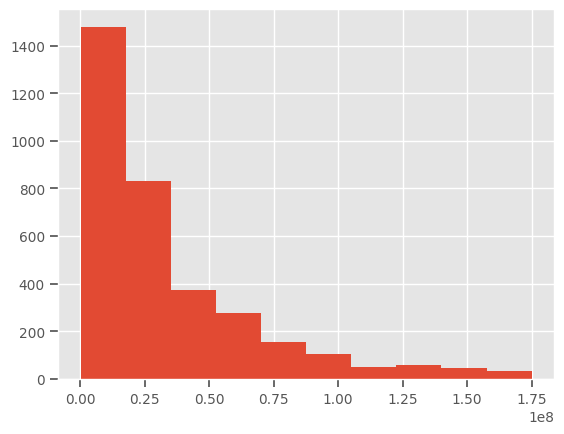

In [12]:
m_df['production_budget'].hist();

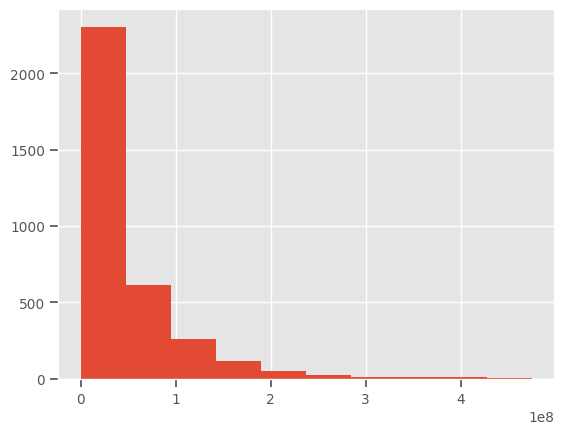

In [13]:
m_df['domestic_gross'].hist();

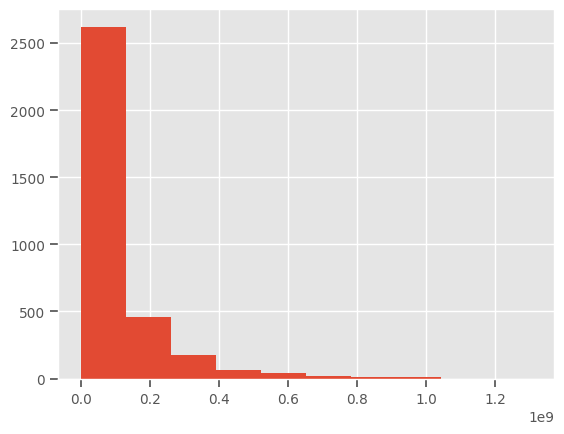

In [14]:
m_df['worldwide_gross'].hist();

## **Explantory Visuals**

In [15]:
domestic = m_df['domestic_gross'].value_counts()

In [ ]:
ax = sns.countplot(data = m_df, x = 'domestic_gross');
ax.set_title('domestic_gross', fontsize=20)
ax.set_ylabel('Percentage', fontsize=20)
ax.set_xlabel("Dollars", fontsize=20)
ax.grid()

Error in callback <function flush_figures at 0x000001E099540550> (for post_execute):
